In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne
from mne.time_frequency import psd_array_multitaper
import os

Loading Data

In [10]:
subject_info= pd.read_csv("C:/Users/kames/Downloads/subject-info.csv")
subject_info
directory_path = ("C:/Users/kames/Downloads/eeg-during-mental-arithmetic-tasks-1.0.0/eeg-during-mental-arithmetic-tasks-1.0.0")
edf_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith('.edf')]
print(len(edf_files))

72


In [11]:
raw_data = []  # All thr data of 72 files is in this list
successful_count = 0
failure_count = 0
for file_path in edf_files:
    try:
        # Load each file
        data = mne.io.read_raw_edf(file_path, preload=True)
        raw_data.append(data)  
        successful_count = successful_count + 1
    except Exception as e:
        failure_count = failure_count + 1

Extracting EDF parameters from C:\Users\kames\Downloads\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from C:\Users\kames\Downloads\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\Subject00_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\kames\Downloads\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\Subject01_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from C:\Users\kames\Downloads\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-ment

In [12]:
data = [] # Organised data 
for i in range(0,len(raw_data),2):
    x = [raw_data[i],raw_data[i+1]]
    data.append(x)
    x = []

In [17]:
print(data[0][0].info)

<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG Fp2, EEG F3, EEG F4, EEG F7, EEG F8, EEG T3, EEG ...
 chs: 21 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 45.0 Hz
 meas_date: 2011-01-01 00:00:00 UTC
 nchan: 21
 projs: []
 sfreq: 500.0 Hz
 subject_info: 4 items (dict)
>


Using matplotlib as 2D backend.


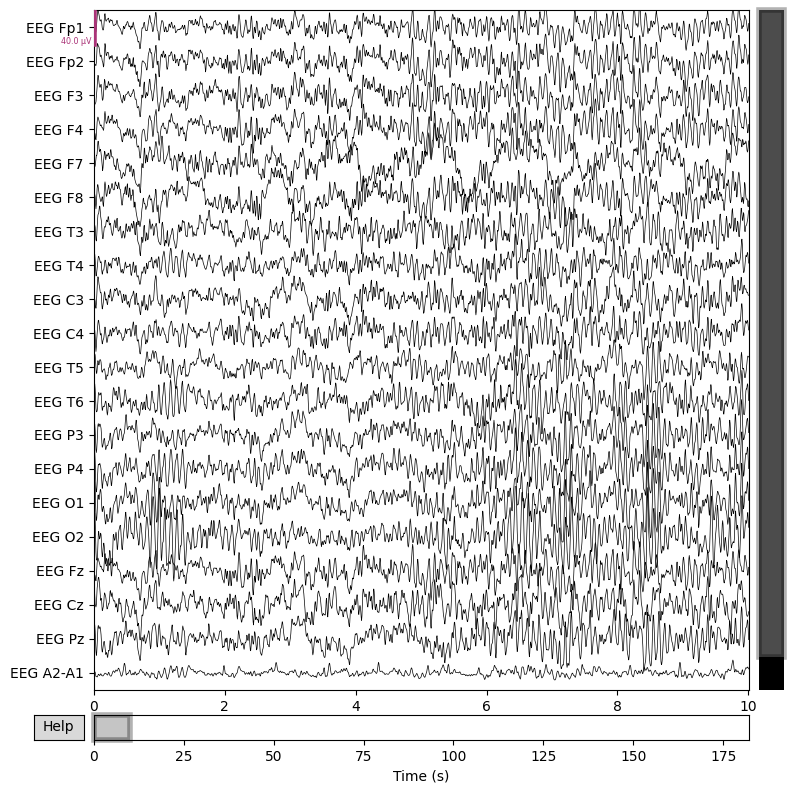

Figure(800x800)


In [18]:
print(data[0][0].plot())

In [19]:
bands = {
    'Delta': (1, 4),
    'Theta': (4, 8),
    'Alpha': (8, 12),
    'Beta': (12, 30),
    'Gamma': (30, 100)
}
for band, (fmin, fmax) in bands.items():
    print(band , (fmin , fmax))

def calculate_psd_pair(eeg_pair, fmin=1, fmax=100):
    """
    The function returns a dictionary containing the PSD data for both the rest and task states of the EEG recording, and an array of the corresponding frequencies
    Each band array holds PSD values corresponding to the average power density in that frequency band across the EEG channels:
    Each value in this array represents the mean power density (in units squared per Hz) for the Delta band, averaged across all EEG channels for one recording. The values are very small because power in these bands is distributed across a spectrum, and because of the square of the voltage measurement in power calculations.
    
    Parameters:
    eeg_pair is list - [Rest , Task] of any subject in edf form , one input of egg_pair is data[0] etc.
    
    """    
    
    bands = {
        'Delta': (1, 4),
        'Theta': (4, 8),
        'Alpha': (8, 12),
        'Beta': (12, 30),
        'Gamma': (30, 100)
    }

    psd_results = {}

    for label, eeg_data in zip(['Rest', 'Task'], eeg_pair):
        # Compute the spectral data using the compute_psd method
        spectrum = eeg_data.compute_psd(method='welch', fmin=fmin, fmax=fmax)
        
        # Extract data and frequencies from the spectrum object
        psd, freqs = spectrum.get_data(return_freqs=True)
        
        # Store PSD for each band
        psd_results[label] = {}
        for band, (fmin_band, fmax_band) in bands.items():
            idx_band = np.logical_and(freqs >= fmin_band, freqs <= fmax_band)
            psd_results[label][band] = psd[:, idx_band].mean(axis=1)
    
    return psd_results

Delta (1, 4)
Theta (4, 8)
Alpha (8, 12)
Beta (12, 30)
Gamma (30, 100)


In [20]:
calculate_psd_pair(data[0]) 

Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


{'Rest': {'Delta': array([5.58688928e-12, 8.46429747e-12, 9.28238123e-12, 1.03892356e-11,
         1.72421417e-11, 1.16535898e-11, 1.29040982e-11, 7.97123270e-12,
         1.18455432e-11, 1.00203450e-11, 9.88673705e-12, 9.10062418e-12,
         8.34236452e-12, 9.16268523e-12, 8.58753429e-12, 1.04116124e-11,
         1.02724567e-11, 2.09339344e-11, 9.82325958e-12, 1.39496697e-12,
         2.12731942e-09]),
  'Theta': array([2.28676821e-12, 2.96430789e-12, 3.79459091e-12, 4.49629232e-12,
         3.97791634e-12, 3.57250316e-12, 4.86329448e-12, 3.14476490e-12,
         3.81608915e-12, 4.51428655e-12, 2.61017361e-12, 3.04536488e-12,
         3.35995048e-12, 3.64947778e-12, 3.50358649e-12, 3.97628677e-12,
         4.47720388e-12, 5.62931609e-12, 3.62718985e-12, 3.72353642e-13,
         8.19471376e-10]),
  'Alpha': array([7.98436168e-12, 9.73123175e-12, 1.26533276e-11, 1.28018061e-11,
         8.53339114e-12, 9.20422013e-12, 1.06869645e-11, 1.05107578e-11,
         1.12460711e-11, 1.09961171

In [23]:
def calculate_psd_pair_mean(eeg_pair, fmin=1, fmax=100):
    
    """
        Calculate the mean Power Spectral Density (PSD) for predefined frequency bands
        from EEG data during 'Rest' and 'Task' states.

        This function processes a pair of EEG recordings for a single subject, one recorded
        during a resting state and the other during a task. It computes the PSD for each state
        using Welch's method across specified frequency bands and returns the mean PSD values
        for each band and state.

        Parameters:
        eeg_pair is list - [Rest , Task] of any subject in edf form , one input of egg_pair is data[0] etc.
        """
    
    bands = {
        'Delta': (1, 4),
        'Theta': (4, 8),
        'Alpha': (8, 12),
        'Beta': (12, 30),
        'Gamma': (30, 100)
    }

    psd_results = {}

    for label, eeg_data in zip(['Rest', 'Task'], eeg_pair):
        # Compute the spectral data using the compute_psd method
        spectrum = eeg_data.compute_psd(method='welch', fmin=fmin, fmax=fmax)
        
        # Extract data and frequencies from the spectrum object
        psd, freqs = spectrum.get_data(return_freqs=True)
        
        # Store PSD for each band
        psd_results[label] = {}
        for band, (fmin_band, fmax_band) in bands.items():
            idx_band = np.logical_and(freqs >= fmin_band, freqs <= fmax_band)
            # Calculate the mean across all electrodes for each frequency band and then take the mean of these values
            psd_results[label][band] = np.mean(psd[:, idx_band], axis=1).mean()

    return psd_results

In [24]:
calculate_psd_pair_mean(data[0])

Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


{'Rest': {'Delta': 1.1098073112978622e-10,
  'Theta': 4.243586159484274e-11,
  'Alpha': 4.6217049997121295e-11,
  'Beta': 8.82424100875858e-12,
  'Gamma': 5.60935859810025e-14},
 'Task': {'Delta': 5.909844646564729e-11,
  'Theta': 3.654851070010193e-11,
  'Alpha': 5.366173734322738e-11,
  'Beta': 9.902899949449655e-12,
  'Gamma': 7.457442628684502e-14}}

In [26]:
psd_mean_dict = {} # Will use this to create seperate frames for delta , theta , alpha , beta , gamma
for i in range(0,36):
    psd_mean_dict[f"Subject_{i}"] = calculate_psd_pair_mean(data[i])
psd_mean_dict
    

Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective wind

{'Subject_0': {'Rest': {'Delta': 1.1098073112978622e-10,
   'Theta': 4.243586159484274e-11,
   'Alpha': 4.6217049997121295e-11,
   'Beta': 8.82424100875858e-12,
   'Gamma': 5.60935859810025e-14},
  'Task': {'Delta': 5.909844646564729e-11,
   'Theta': 3.654851070010193e-11,
   'Alpha': 5.366173734322738e-11,
   'Beta': 9.902899949449655e-12,
   'Gamma': 7.457442628684502e-14}},
 'Subject_1': {'Rest': {'Delta': 5.0944670238608954e-11,
   'Theta': 2.1069733077745335e-11,
   'Alpha': 1.4795169952408154e-11,
   'Beta': 3.421524403355647e-12,
   'Gamma': 1.403730114186065e-13},
  'Task': {'Delta': 6.082792240801813e-11,
   'Theta': 1.5185084479168213e-11,
   'Alpha': 1.0936232280309845e-11,
   'Beta': 3.033246398578443e-12,
   'Gamma': 1.9951993715430813e-13}},
 'Subject_2': {'Rest': {'Delta': 1.675066666633942e-11,
   'Theta': 3.398684761223428e-12,
   'Alpha': 7.427257363364948e-12,
   'Beta': 1.4892047337325012e-12,
   'Gamma': 8.460579610071937e-14},
  'Task': {'Delta': 6.709077697621697

In [27]:
data_list = []
for subject, details in psd_mean_dict.items():
    row = {
        'Subject': subject,
        **{f'Rest_{band}': values for band, values in details['Rest'].items()},
        **{f'Task_{band}': values for band, values in details['Task'].items()}
    }
    data_list.append(row)

# Create DataFrame , one type of data frame (Maybe used in future , just created once)
df_1 = pd.DataFrame(data_list)

In [28]:
data_list = [] # Main dataframe that will be used for anaylysis of mean psds over different frequency brands averaged over all 21 channels

columns = pd.MultiIndex.from_product(
    [['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma'], ['Rest', 'Task']],
    names=['Band', 'Condition']
)

# Iterate over each subject in the dictionary
for subject, details in psd_mean_dict.items():
    # Extract values for rest and task, format them in order for the DataFrame
    row = []
    for band in ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']:
        row.extend([details['Rest'].get(band, None), details['Task'].get(band, None)])
    data_list.append(row)

# Create DataFrame with subject names as index
df = pd.DataFrame(data_list, columns=columns, index=[f"Subject_{i}" for i in range(len(psd_mean_dict))])

In [29]:
df_delta = df['Delta']
df_theta = df['Theta']
df_alpha = df['Alpha']
df_beta = df['Beta']
df_gamma = df['Gamma']

Visualization of all subjects across all 5 frequency bands at each state (rest,active)


In [39]:
def plot_band_psd(df_band, band_name):
    """
    Plots the PSD values for 'Rest' and 'Task' from a given DataFrame for a specific band.

    Parameters:
    - df_band: DataFrame containing 'Rest' and 'Task' PSD values.
    - band_name: String representing the name of the band (e.g., 'Delta', 'Theta').
    """
    # Assuming df_delta is already defined and available
    data_frame = df_band  # This is your DataFrame for the Delta band
    band_name = band_name  # Specifying the band name you want to plot

    # Create a single plot for the Delta band
    fig, ax = plt.subplots(figsize=(10, 5))  # Adjusting the size for a single subplot
    colors = {'Rest': 'Red', 'Task': 'blue'}

    # Plotting Rest and Task data
    data_frame['Rest'].plot(kind='bar', color=colors['Rest'], ax=ax, position=0, width=0.3, label='Rest')
    data_frame['Task'].plot(kind='bar', color=colors['Task'], ax=ax, position=1, width=0.3, label='Task')

    ax.set_title(f'{band_name} Band Power Spectral Density')
    ax.set_xlabel('Subjects')
    ax.set_ylabel('PSD Values')
    ax.legend()

    plt.tight_layout()
    plt.show()


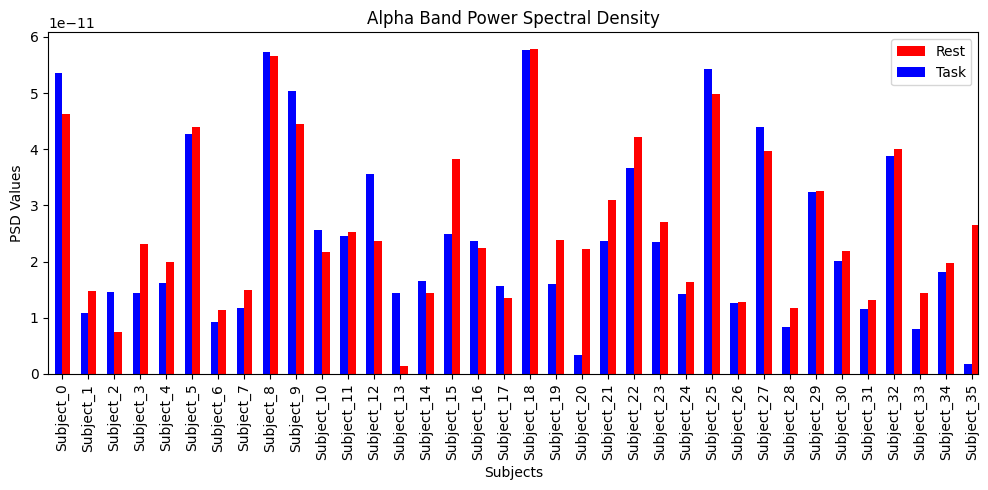

In [42]:
plot_band_psd(df_alpha,'Alpha') 

The analysis of the Alpha band (8-12 Hz) highlights notable variability in power across subjects, indicative of individual differences in baseline brain activities. This variability can be attributed to a range of factors including age, cognitive abilities, and unique neurophysiological profiles. During rest periods, some subjects exhibit higher Alpha power, reflecting states of relaxed wakefulness and reduced cognitive engagement. In contrast, others show increased Alpha power during tasks, suggesting engagement in cognitive processes such as visual imagery or memory retrieval, which enhance Alpha band activity. These findings underscore the Alpha band's role not only in reflecting varied cognitive states but also in responding dynamically to task-specific demands.

Potential Cognitive Implications:

The observed increase in Alpha power during tasks may indicate optimal engagement levels where the mind is sufficiently engaged in cognitive activities without being overly aroused. This suggests that Alpha rhythms serve as a sensitive marker of cognitive workload and attentional states during tasks. Additionally, the diversity in Alpha band responses across subjects suggests individual differences in cognitive strategies and task processing styles. Understanding these variations can provide insights into how individuals perceive and interact with cognitive challenges, potentially informing personalized approaches to cognitive training and performance enhancement strategies.

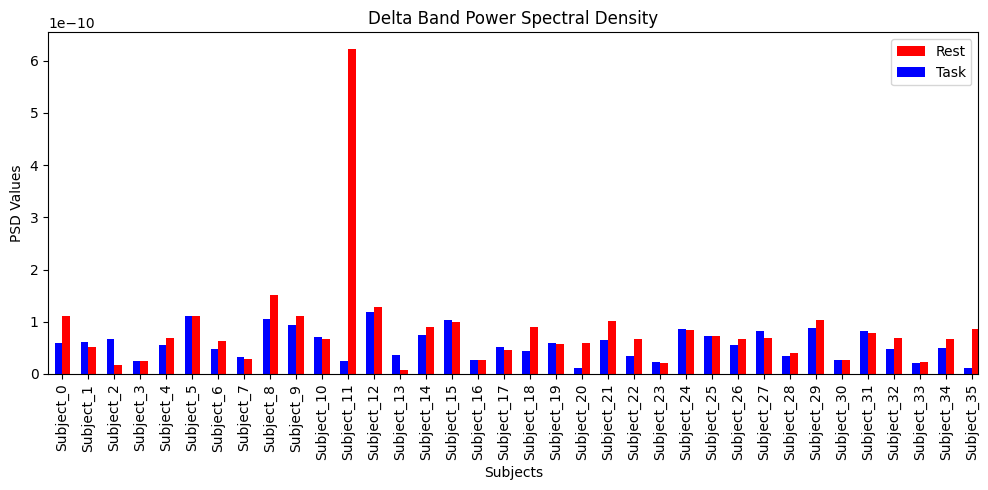

In [40]:
plot_band_psd(df_delta,'Delta')


The analysis of the Delta band (0.5-4 Hz) revealed significant variability in PSD values across different subjects, indicating individual differences in brain activity within this frequency range. This variability could be attributed to factors such as age, health status, neural synchrony, sleep patterns, and overall neurophysiological characteristics. 

Notably, the PSD values were generally higher during rest conditions compared to task conditions, which aligns with the established association of Delta waves with non-REM sleep and deep relaxation states. Conversely, a decrease in Delta activity was observed during task conditions, reflecting a shift from a restful state to a more alert and engaged brain state, which suppresses slower wave activity in favor of cognitive processing. These findings suggest that Delta band activity is a sensitive marker of the brain's state, with higher activity during rest and reduced activity during tasks requiring cognitive engagement

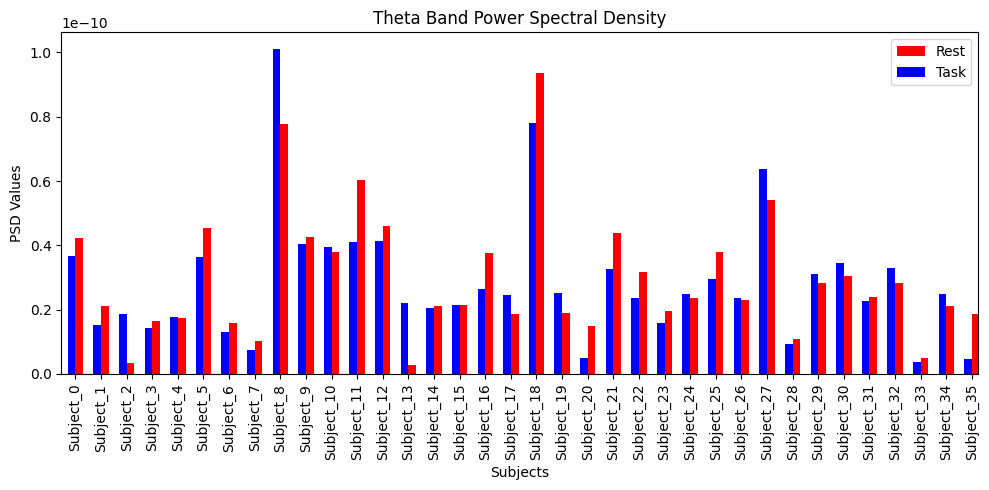

In [41]:
plot_band_psd(df_theta,'Theta')


The analysis of the Theta band (4-8 Hz) exhibited significant inter-subject variability, a common finding in EEG studies due to individual differences in brain structure and function. This variability suggests diverse neural responses across subjects, influenced by factors such as age, cognitive abilities, and physiological differences.

In examining state differences, some subjects displayed higher PSD values in the Theta band during the 'Task' condition compared to the 'Rest' state. This observation suggests increased cognitive effort or engagement during task performance. Conversely, other subjects exhibited higher Theta band PSD values during 'Rest', potentially indicating a state of relaxation or meditative calm during these periods.

These findings suggest that Theta band activity reflects dynamic neural responses to task-specific demands. Higher PSD values during tasks may correlate with cognitive processes such as memory encoding or spatial navigation, known to activate Theta rhythms. In contrast, elevated Theta activity during rest periods could signify states of relaxed wakefulness or contemplative introspection, highlighting the band's role in modulating brain states associated with varying cognitive demands and mental states.

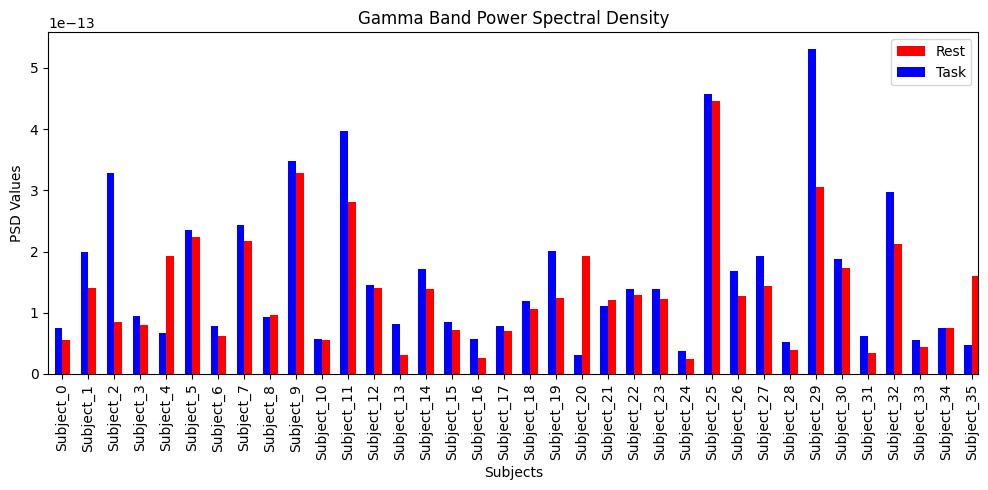

In [43]:
plot_band_psd(df_gamma,'Gamma') # Gamma Plot


Summary of Gamma Band

Inter-subject variability in Gamma band power is evident, reflecting diverse neural responses across subjects, influenced by factors such as cognitive abilities, task demands, and individual neurophysiological characteristics. Gamma waves (30-100 Hz) are predominantly associated with active cognitive processes, including information processing, attention, and memory encoding.

The majority of subjects demonstrate higher Gamma power during the 'Task' condition compared to 'Rest'. This pattern aligns with Gamma waves' role in supporting active thinking and concentration during cognitive tasks. However, notable exceptions exist where some subjects exhibit minimal changes or even decreased Gamma activity during tasks. This variability suggests that task-specific factors, individual cognitive strategies, or differing levels of task engagement may influence Gamma band dynamics.

Potential Cognitive Implications:

The observed increase in Gamma power during tasks suggests an optimal state of cognitive engagement and information processing. It indicates that the majority of subjects effectively mobilize Gamma band activity to meet cognitive demands during task performance. Conversely, instances of reduced Gamma activity during tasks might indicate less demanding or more routine tasks, or possibly strategies where cognitive load is managed differently. Understanding these individual variations in Gamma band responses provides insights into how individuals approach and process cognitive challenges, potentially informing strategies for optimizing cognitive performance and task engagement in various contexts.

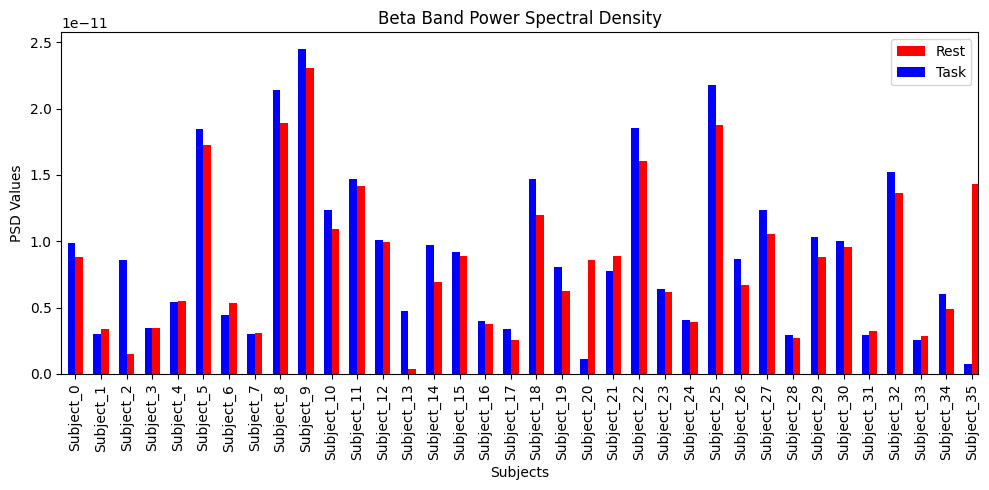

In [44]:
plot_band_psd(df_beta,'Beta') # Beta Plot

Summary of Beta Band

Inter-subject Variability:
Similar to other frequency bands, the Beta band (13-30 Hz) exhibits notable variability in power across subjects. This variability reflects individual differences in cognitive processing, neural connectivity, and potentially the specific nature of tasks assigned during the 'Task' state. These factors contribute to diverse patterns of Beta band activity observed across subjects.

Beta Band Dynamics:

Rest State: In relaxed, non-focused states such as 'Rest', Beta activity tends to be lower. This pattern is evident in the dataset for some subjects, where Beta power decreases during periods of restful wakefulness.

Task State: During tasks requiring active engagement, alertness, or concentration (such as problem-solving, planning, or decision-making), Beta activity typically increases. The dataset reveals higher Beta power during 'Task' conditions for many subjects, indicating their involvement in cognitively demanding activities.

Comparison Between Conditions:

The majority of subjects demonstrate higher Beta power during the 'Task' condition compared to 'Rest'. This alignment with Beta waves' association with active thinking and concentration suggests effective mobilization of Beta band activity during cognitive tasks. However, there are exceptions where some subjects exhibit minimal changes or even decreased Beta activity during tasks. These variations may stem from differences in task complexity, individual strategies for task execution, or varying levels of task engagement among subjects.

Potential Cognitive Implications:

The observed variability in Beta band responses underscores its role as a sensitive marker of cognitive engagement and task demands. Understanding individual variations in Beta activity can provide insights into how different individuals approach and process cognitive challenges. This knowledge can inform strategies for optimizing cognitive performance, task management, and the development of personalized approaches to cognitive enhancement and performance optimizat